In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def loadIQBinary(file):
    # note: works for floats
    return np.fromfile(file, dtype=np.complex64)

# def loadIQTest(file):
#     x = np.fromfile(file, dtype=np.float32)
#     series = x[1::2] + 1j*x[0::2]
#     return series

In [3]:
# try this out on a file

x = loadIQBinary("../data/test_outside_Feb27/pre_check.dat")
# x2 = loadIQTest("../data/test_outside_Feb27/pre_check.dat")

print("x loaded {} elements".format(x.shape[0]))
# print("x2 loaded {} elements".format(x2.shape[0]))

x loaded 1000000 elements


<IPython.core.display.Javascript object>


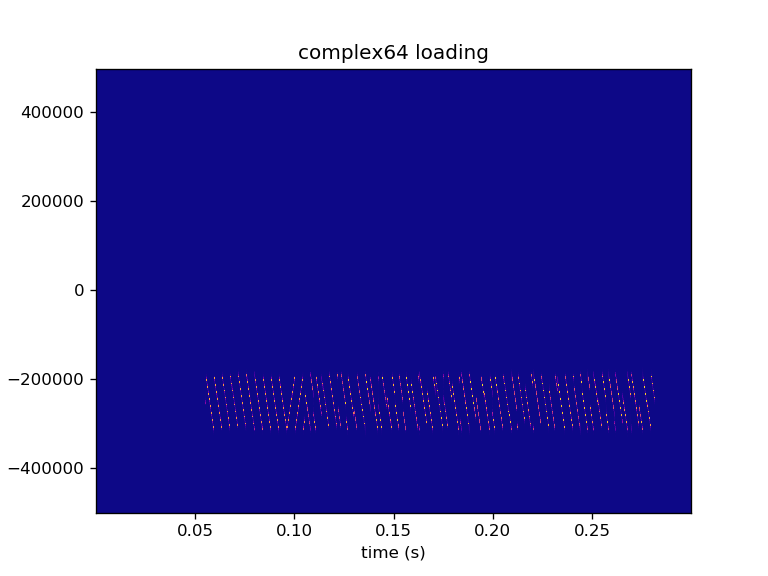

f: [      0.      3906.25    7812.5    11718.75   15625.     19531.25
   23437.5    27343.75   31250.     35156.25   39062.5    42968.75
   46875.     50781.25   54687.5    58593.75   62500.     66406.25
   70312.5    74218.75   78125.     82031.25   85937.5    89843.75
   93750.     97656.25  101562.5   105468.75  109375.    113281.25
  117187.5   121093.75  125000.    128906.25  132812.5   136718.75
  140625.    144531.25  148437.5   152343.75  156250.    160156.25
  164062.5   167968.75  171875.    175781.25  179687.5   183593.75
  187500.    191406.25  195312.5   199218.75  203125.    207031.25
  210937.5   214843.75  218750.    222656.25  226562.5   230468.75
  234375.    238281.25  242187.5   246093.75  250000.    253906.25
  257812.5   261718.75  265625.    269531.25  273437.5   277343.75
  281250.    285156.25  289062.5   292968.75  296875.    300781.25
  304687.5   308593.75  312500.    316406.25  320312.5   324218.75
  328125.    332031.25  335937.5   339843.75  343750.    34

In [12]:
y = x[200000:500000]
# y2 = x2[200000:500000]

def plotSpectrogram(x, fs):
    plt.figure()
    nperseg = 256
    f, t, Sxx = sig.spectrogram(x, fs,
                                nperseg=nperseg, noverlap=nperseg*3/4,
                                scaling='spectrum', return_onesided=False)
    print("f:", f)
    print("fftshift(f):", np.fft.fftshift(f))
    # p = plt.pcolormesh(t, np.fft.fftshift(f), np.fft.fftshift(Sxx, axes=0), cmap='plasma')
    p = plt.pcolormesh(t, f, Sxx, cmap='plasma')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    return p

plotSpectrogram(y, 1.0e6)
plt.title("complex64 loading")
plt.ylabel("freq offset (Hz)")
plt.xlabel("time (s)")

# plotSpectrogram(y2, 1.0e6)
# plt.title("float32 loading")
# plt.ylabel("freq offset (Hz)")
# plt.xlabel("time (s)")

plt.show()